# Observations Plots for Poster:

## Physics:
### 1. Contour Plot of Sigma T overlayed with MLD + 25.8 isopycnal (check)

### 2. Nutrient Contours (check)

### 3. PAR + Temp

## Biotics:
### 1. Primary Production

### 2. HPLC-Chla (Total - potentially show Diatom component, cut down gap?)

### 3. Zooplankton

In [95]:
require(ncdf4, warn.conflicts = FALSE);
require(ggplot2, warn.conflicts = FALSE);
require(cowplot, warn.conflicts = FALSE);
require(tidyverse, warn.conflicts = FALSE);
require(MBA)
require(lubridate)
require(scales)
require(oce)

require(colorRamps)
require(reshape2)
library(padr)

# FUNCTIONS

In [163]:
saveplot <- function(filename, plotobj, width=11, height=6, useDingbats=FALSE){
    ggsave(paste(filename,'.pdf', sep=''), plotobj, width=width, height=height, useDingbats=useDingbats)
}

In [96]:
# function to prepare data frame for interpolation
#' 1. rename columns
prep_df_ntrplt <- function(dataframe){
  
  colnames(dataframe) <- c("date", "depth", "var")
  
  return(dataframe)
}


# function to return interpolated data frame:
#' "The function mba.surf returns a surface approximated from a 
#' bivariate scatter of data points using multilevel B-splines."
ntrplt <-function(dataframe, res = 1000, extended=T){
  
  dataframe$date <- decimal_date(dataframe$date)

  mba <- mba.surf(dataframe[,c('date', 'depth', 'var')], no.X = res, no.Y = res, extend = extended) #, m = 3, h = 5)
  dimnames(mba$xyz.est$z) <- list(mba$xyz.est$x, mba$xyz.est$y)
  df3 <- melt(mba$xyz.est$z, varnames = c('date', 'depth'), value.name = 'var')

  return(df3)
}


In [97]:
# function create oceanographic plot from interpolated data frame
#' it plots the original data points on top of the interpolated data 
plt.ocean <-function(df_int,dataframe, deplims=c(150,0)){
  #dataframe$date <- decimal_date(as.Date(dataframe$date))
  
  Fig <-
    ggplot(data=df_int, aes(date, depth)) +
    
    geom_raster(aes(fill = var), interpolate = F, hjust = 0.5, vjust = 0.5) +
    #geom_contour(aes(z = var)) + 
    
    #geom_point(data = dataframe, aes(date, depth), colour = 'white', alpha = 0.5, size=0.01) +
    scale_x_continuous(expand=c(0,0), breaks = c(1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
    scale_y_reverse(expand=c(0,0), limits=deplims) +
    scale_fill_gradientn(colours = matlab.like2(5))
  
  return(Fig)
}

In [98]:
createNAmonthDF <- function(df){
    NAmonths <- df %>% 
        pad %>% 
        add_column('month'=as.integer(format(.$date, format='%m'))) %>%
        add_column('year'=format(.$date, format='%Y')) %>%
        group_by(year,month)%>%
        summarise(non_na_count = sum(!is.na(val))) %>%
        filter(non_na_count == 0) %>%
        add_column('date'=as.Date(paste(.$year,'-',.$month,'-15',sep='')))
    
    return(NAmonths)
}

# SIGMA T PHYSICS PLOT

In [164]:
# open a NetCDF file
ctdat <- nc_open("Data/ctd.netcdf")

#print(niskdat)

In [165]:
ctdat_df <- data.frame("Num" = 1:ctdat$dim$unlimited$len)
print('start')
for(i in 1:ctdat$nvars){
    #print(i)
    ctdat_df[paste(attributes(ctdat$var)$names[i])] <- ncvar_get(ctdat, attributes(ctdat$var)$names[i])
}
print('done reading')
head(ctdat_df)

ctdat_df$date <- as.Date(ctdat_df$Date)

ctdat_df$press <- as.numeric(ctdat_df$press)
ctdat_df$depth <- as.numeric(ctdat_df$depth)
ctdat_df$temp <- as.numeric(ctdat_df$temp)
ctdat_df$sal <- as.numeric(ctdat_df$sal)
ctdat_df$potemp <- as.numeric(ctdat_df$potemp) 
ctdat_df$sigma_t <- as.numeric(ctdat_df$sigma_t)
ctdat_df$sigma_0 <- as.numeric(ctdat_df$sigma_0)
ctdat_df$O2_ml_L <- as.numeric(ctdat_df$O2_ml_L)
ctdat_df$beam_cp <- as.numeric(ctdat_df$beam_cp)
ctdat_df$beam_att <- as.numeric(ctdat_df$beam_att)
ctdat_df$fluor_CTD <- as.numeric(ctdat_df$fluor_CTD)
ctdat_df$fluor_chla <- as.numeric(ctdat_df$fluor_chla)

ctdat_df[ctdat_df>10000000000]=NA

[1] "start"
[1] "done reading"


Num,cruise_no,Cruise_ID1,Cruise_ID2,Year,Month,Day,Date,Latitude,Longitude,...,temp,sal,potemp,sigma_t,sigma_0,O2_ml_L,beam_cp,beam_att,fluor_CTD,fluor_chla
1,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,,36.612,,,,,,,0.173,
2,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.522,36.612,27.522,23.764,23.764,3.964,,,0.176,
3,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.489,36.612,27.488,23.775,23.775,3.978,,,0.166,
4,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.465,36.614,27.464,23.782,23.782,3.984,,,0.164,
5,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.458,36.613,27.456,23.786,23.787,3.990,,,0.170,
6,1,93HG_001,CAR-001,1995,11,8,1995-11-08,10.5,-64.667,...,27.454,36.613,27.452,23.787,23.787,3.992,,,0.175,


In [166]:
dfX = data.frame(date = ctdat_df$date, val = ctdat_df$sigma_t)

sigma_t_NApad <- createNAmonthDF(dfX)

ctdat_df_pad <- bind_rows(ctdat_df, sigma_t_NApad)

pad applied on the interval: day


In [167]:
CTDx258 <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= 25.8) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [168]:
x258dfX = data.frame(date = CTDx258$date, val = CTDx258$depth)

x258_NAmonths <- createNAmonthDF(x258dfX)

x258_df_pad <- bind_rows(CTDx258, x258_NAmonths)

pad applied on the interval: day


In [169]:
cat(names(ctdat_df))

Num cruise_no Cruise_ID1 Cruise_ID2 Year Month Day Date Latitude Longitude press depth temp sal potemp sigma_t sigma_0 O2_ml_L beam_cp beam_att fluor_CTD fluor_chla date

In [170]:
head(ctdat_df$sal)

[1] 36.612 36.612 36.612 36.614 36.613 36.613

In [171]:
zz <- seq(0, 150, 1)

sal_X <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press < 20) %>% 
  do(data.frame(value_int = with(.,oceApprox(depth, sigma_t, zz, "rr")), depth = zz)) #%>%
  #summarise(meansal = mean(value_int, na.rm=T)) %>% # only 
  #mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  #filter(belowmld == T) %>% # only take "True" values 
  #slice(1) %>% # takes the first occurrence
  #ungroup() #removes grouping

In [172]:

XYZ = data.frame(sal_X$date, sal_X$depth, sal_X$value_int)

XYZ = XYZ[complete.cases(XYZ),]

XYZ2 = prep_df_ntrplt(XYZ)

XYZint = ntrplt(XYZ2)

In [173]:
rXYZ = data.frame(ctdat_df_pad[ctdat_df_pad$depth<150,]$date, ctdat_df_pad[ctdat_df_pad$depth<150,]$depth, ctdat_df_pad[ctdat_df_pad$depth<150,]$sigma_t)

rXYZ = rXYZ[complete.cases(rXYZ),]

rXYZ2 = prep_df_ntrplt(rXYZ)

In [174]:
str(XYZ)

'data.frame':	34183 obs. of  3 variables:
 $ sal_X.date     : Date, format: "1995-11-08" "1995-11-08" ...
 $ sal_X.depth    : num  2 3 4 5 6 7 8 9 10 11 ...
 $ sal_X.value_int: num  23.8 23.8 23.8 23.8 23.8 ...


In [175]:
mld_depth <- ctdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  filter(press > 5) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [176]:
options(repr.plot.width=14, repr.plot.height=6)

In [194]:
ft = plt.ocean(XYZint,rXYZ2) + xlab('Date [years]') + ylab('Depth [m]') + labs(fill='Sigma T [Kg/m^3]')

sigmatPLOT <- ft + geom_line(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso'), alpha=1) + #scale_x_continuous(limits=layer_scales(ft)$x$range$range, expand=c(0,0))+
geom_point(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso')) +
geom_point(data = mld_depth, aes(y=depth,x=decimal_date(date), col='MLD')) +
geom_line(data = mld_depth, aes(y=depth,x=decimal_date(date), col='MLD')) + labs(col='Lines')+ scale_color_manual(values=c('white','grey'))+
theme_cowplot(15)+ggtitle('Sigma t time series + 25.8 isopycnal (white line)')

In [195]:
saveplot('sigmatPLOT',sigmatPLOT, width = 14, height=6)

Warning message:
“Removed 27 rows containing missing values (geom_point).”

Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


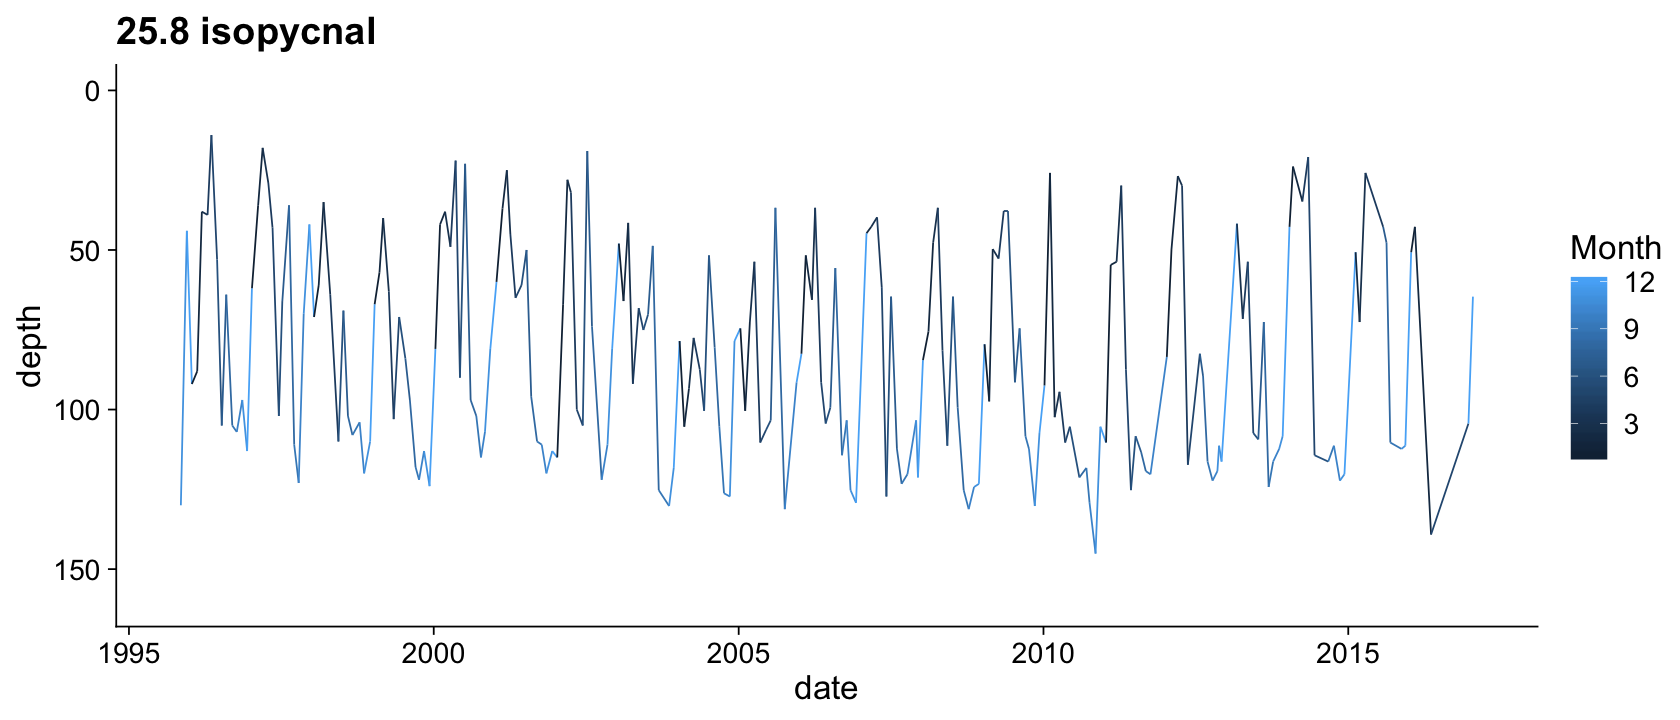

In [22]:
ggplot()+geom_line(data=CTDx258,aes(x=date,y=depth, col=Month)) + 
theme_cowplot(20) +  scale_y_continuous(trans = "reverse") + ylim(160,0) + ggtitle('25.8 isopycnal')

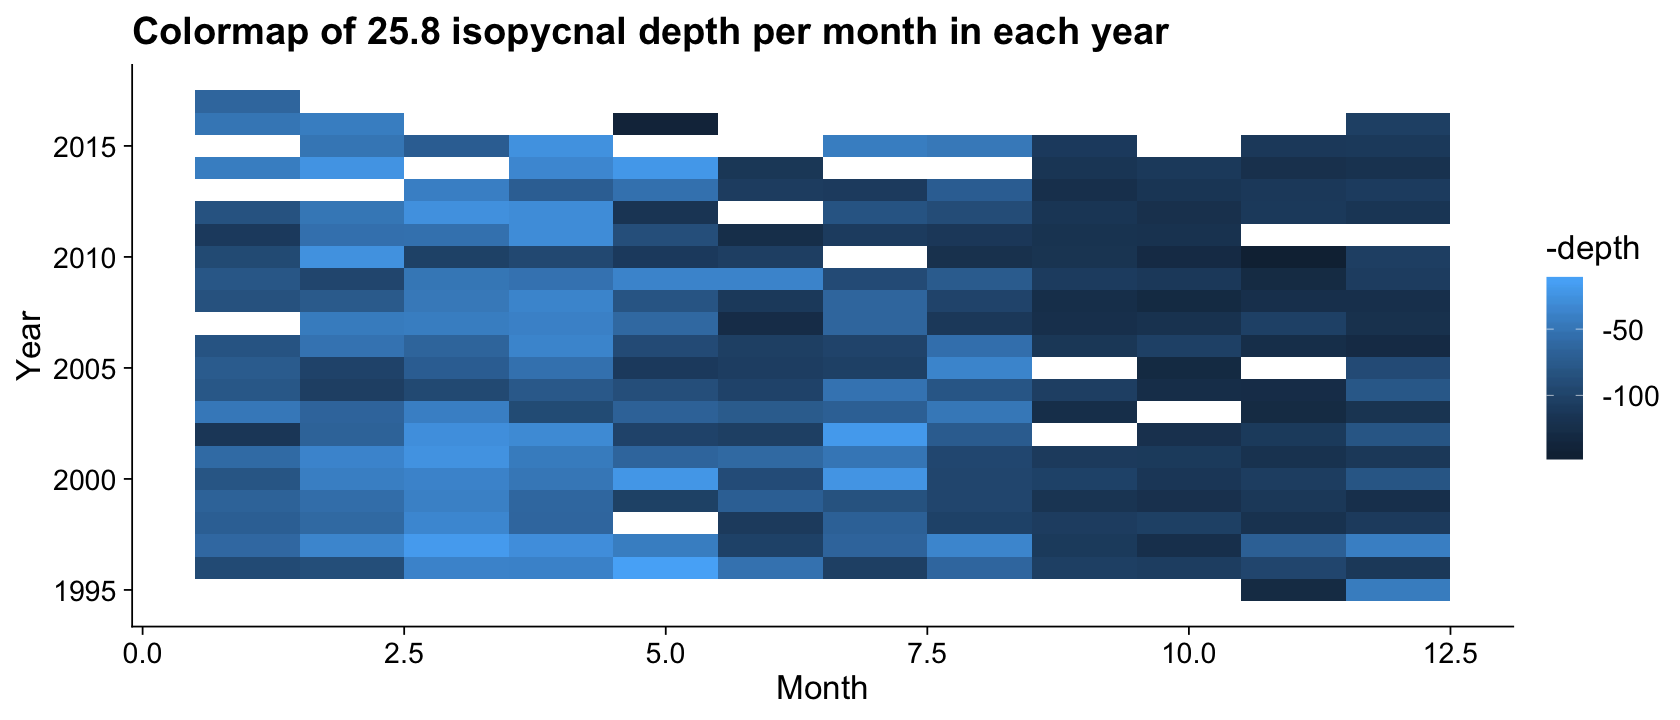

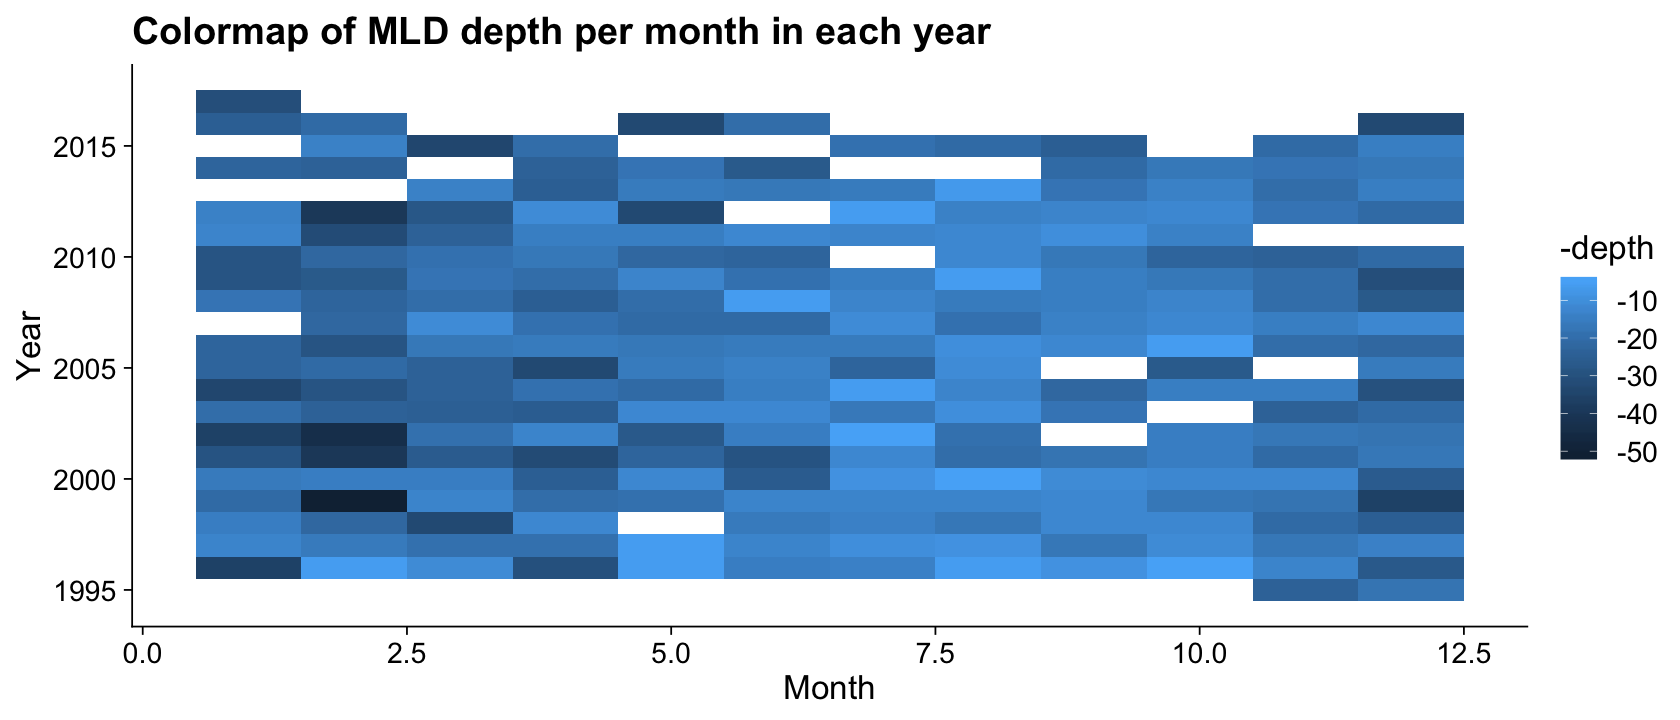

In [23]:
ggplot()+geom_tile(data=CTDx258,aes(x=Month,y=Year, fill=-depth)) + theme_cowplot(20) +
ggtitle('Colormap of 25.8 isopycnal depth per month in each year')
#+  scale_y_continuous(trans = "reverse") #+ ylim(160,0) + ggtitle('25.8 isopycnal')


ggplot()+geom_tile(data=mld_depth,aes(x=Month,y=Year, fill=-depth)) + theme_cowplot(20) +
ggtitle('Colormap of MLD depth per month in each year')
#+  scale_y_continuous(trans = "reverse") #+ ylim(160,0) + ggtitle('25.8 isopycnal')

# Nitrate + Silicate + Phosphate

In [8]:
# open a NetCDF file
niskdat <- nc_open("Data/niskin.netcdf")

#print(niskdat)

# Read entire ncdf file to r DataFrame

In [24]:
niskdat_df <- data.frame("Num" = 1:niskdat$dim$unlimited$len)
print('start')
for(i in 1:niskdat$nvars){
    #print(i)
    niskdat_df[paste(attributes(niskdat$var)$names[i])] <- ncvar_get(niskdat, attributes(niskdat$var)$names[i])
}
print('done reading')
head(niskdat_df)

[1] "start"
[1] "done reading"


Num,Cruise_number,Cruise_ID_1,Cruise_ID_2,Leg,Day,Month,Year,Latitude,Longitude,...,Bact_Biomass_uMC,Bio_cast_no,ISO_DateTime_start_hc_local,ISO_DateTime_end_hc_local,ISO_DateTime_start_bc_local,ISO_DateTime_end_bc_local,ISO_DateTime_start_hc_UTC,ISO_DateTime_end_hc_UTC,ISO_DateTime_start_bc_UTC,ISO_DateTime_end_bc_UTC
1,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
2,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
3,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
4,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
5,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00
6,1,93HG_001,CAR-001,2,8,11,1995,10.5,-64.667,...,BM_master,2,1995-11-08T06:12:00,1995-11-08T06:38:00,1995-11-08T03:36:00,1995-11-08T03:54:00,1995-11-08T10:12:00,1995-11-08T10:38:00,1995-11-08T07:36:00,1995-11-08T07:54:00


In [25]:
cat(names(niskdat_df))

Num Cruise_number Cruise_ID_1 Cruise_ID_2 Leg Day Month Year Latitude Longitude Hydro_cast_no Depth_target Depth_real O2_ml_L q_O2_ml_L O2_umol_kg q_O2_umol_kg NO3_UDO q_NO3_UDO PO4_UDO q_PO4_UDO SiO4_UDO q_SiO4_UDO NH4_USF q_NH4_USF NO2_USF q_NO2_USF NO3_NO2_USF q_NO3_NO3_USF PO4_USF q_PO4_USF SiO4_USF q_SiO4_USF pH q_pH Alkalinity_mol_kg q_Alkalinity_mol_kg Alkalinity_umol_kg q_Alkalinity_umol_kg TCO2 q_TCO2 fCO2 q_fCO2 pH_corrected q_pH_corrected TCO2_corrected q_TCO2_corrected fCO2_corrected q_fCO2_corrected Salinity_bottles q_Salinity_bottles Salinity_CTD q_Salinity_CTD Temperature q_Temperature Sigma_t q_Sigma_t TPP q_TPP PIP q_PIP POC_ug_kg q_POC_ug_kg PON_ug_kg q_PON_ug_kg POC_ug_L q_POC_ug_L PN_ug_L q_PN_ug_L C_N_particulate q_C_N_particulate DON q_DON DOP q_DOP DOC q_DOC TOC q_TOC PrimaryProductivity q_PrimaryProductivity Chlorophyll q_Chlorophyll Phaeopigments q_Phaeopigments Total_Prokaryotes Bact_Biomass_mgC_m3 Bact_Biomass_uMC Bio_cast_no ISO_DateTime_start_hc_local ISO_D

In [26]:
niskdat_df$Salinity_bottles <- as.numeric(niskdat_df$Salinity_bottles)
niskdat_df$Salinity_CTD <- as.numeric(niskdat_df$Salinity_CTD)

In [27]:
niskdat_df$date <- as.Date(substr(niskdat_df$ISO_DateTime_end_hc_UTC, 0, 10))

niskdat_df$Depth_real <- as.numeric(niskdat_df$Depth_real)
niskdat_df$Depth_target <- as.numeric(niskdat_df$Depth_target)

niskdat_df$Temperature <- as.numeric(niskdat_df$Temperature)
niskdat_df$NO3_NO2_USF <- as.numeric(niskdat_df$NO3_NO2_USF)
niskdat_df$NO3_UDO <- as.numeric(niskdat_df$NO3_UDO)
niskdat_df$SiO4_USF <- as.numeric(niskdat_df$SiO4_USF)
niskdat_df$PO4_USF <- as.numeric(niskdat_df$PO4_USF)

niskdat_df$Sigma_t <- as.numeric(niskdat_df$Sigma_t)

In [63]:
zz <- seq(0, 250, 1)

no3_X <- niskdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press < 20) %>% 
  do(data.frame(value_int = with(.,oceApprox(Depth_real, NO3_NO2_USF, zz, "unesco")), depth = zz)) #%>%
  #summarise(meansal = mean(value_int, na.rm=T)) %>% # only 
  #mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  #filter(belowmld == T) %>% # only take "True" values 
  #slice(1) %>% # takes the first occurrence
  #ungroup() #removes grouping


In [79]:
#head( no3_UDO_X)

In [65]:
no3_xyz = data.frame(no3_X$date, no3_X$depth, no3_X$value_int)

no3_xyz = no3_xyz[complete.cases(no3_xyz),]

no3_xyz2 = prep_df_ntrplt(no3_xyz)

no3_xyzint = ntrplt(no3_xyz2)

In [66]:
sum(no3_xyz2$var<0)

[1] 52

In [67]:
sum(no3_xyz2$var<0)

[1] 52

In [68]:
# no3_UDO_xyz = data.frame(no3_UDO_X$date, no3_UDO_X$depth, no3_UDO_X$value_int)
# no3_UDO_xyz = no3_UDO_xyz[complete.cases(no3_UDO_xyz),]
# no3_UDO_xyz2 = prep_df_ntrplt(no3_UDO_xyz)
# no3_UDO_xyzint = ntrplt(no3_UDO_xyz2)

In [69]:
rno3 = data.frame(niskdat_df[niskdat_df$Depth_real<250,]$date, niskdat_df[niskdat_df$Depth_real<250,]$Depth_real, niskdat_df[niskdat_df$Depth_real<250,]$NO3_NO2_USF)
rno3 = rno3[complete.cases(rno3),]
rno3_2 = prep_df_ntrplt(rno3)

In [70]:
str(rno3_2)

'data.frame':	2334 obs. of  3 variables:
 $ date : Date, format: "1997-05-10" "1997-05-10" ...
 $ depth: num  116 131 140 151 161 ...
 $ var  : num  9.13 10.3 11.59 10.97 10.4 ...


In [71]:
options(repr.plot.width=14, repr.plot.height=6)

In [183]:
ft = plt.ocean(no3_xyzint,0,deplims=c(250,0)) + xlab('Date [years]') + ylab('Depth [m]') + labs(fill='NO3+NO2 [muM]')

nitratePLOT <- ft + geom_point(data = rno3_2, aes(y=depth,x=decimal_date(date)), col='white', size=0.5,alpha=0.3) +
theme_cowplot(15)+ggtitle('Time series of surface Nitrate')+

geom_line(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso'), alpha=1) +
geom_point(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso')) + scale_color_manual(values=c('white'))

In [184]:
saveplot('nitratePLOT',nitratePLOT, width = 14, height=6)

Warning message:
“Removed 27 rows containing missing values (geom_point).”

In [81]:
zz <- seq(0, 250, 1)

po4_X <- niskdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press < 20) %>% 
  do(data.frame(value_int = with(.,oceApprox(Depth_real, PO4_USF, zz, "unesco")), depth = zz)) #%>%
  #summarise(meansal = mean(value_int, na.rm=T)) %>% # only 
  #mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  #filter(belowmld == T) %>% # only take "True" values 
  #slice(1) %>% # takes the first occurrence
  #ungroup() #removes grouping


In [84]:
rpo4 = data.frame(niskdat_df[niskdat_df$Depth_real<250,]$date, niskdat_df[niskdat_df$Depth_real<250,]$Depth_real, niskdat_df[niskdat_df$Depth_real<250,]$PO4_USF)
rpo4 = rpo4[complete.cases(rpo4),]
rpo4_2 = prep_df_ntrplt(rpo4)

In [83]:
po4_xyz = data.frame(po4_X$date, po4_X$depth, po4_X$value_int)
po4_xyz = po4_xyz[complete.cases(po4_xyz),]
po4_xyz2 = prep_df_ntrplt(po4_xyz)
po4_xyzint = ntrplt(po4_xyz2)

In [185]:
ft = plt.ocean(po4_xyzint,0,deplims=c(250,0)) + xlab('Date [years]') + ylab('Depth [m]') + labs(fill='PO4 [muM]')

phosphatePLOT <- ft + geom_point(data = rpo4_2, aes(y=depth,x=decimal_date(date)), col='white', size=0.5,alpha=0.3) +
theme_cowplot(15)+ggtitle('Time series of surface Phosphate')+

geom_line(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso'), alpha=1) +
geom_point(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso')) + scale_color_manual(values=c('white'))

In [186]:
saveplot('phosphatePLOT',phosphatePLOT, width = 14, height=6)

Warning message:
“Removed 27 rows containing missing values (geom_point).”

In [87]:
zz <- seq(0, 250, 1)

sio4_X <- niskdat_df %>%
  group_by(date) %>% # this groups it by the run number 
  #filter(press < 20) %>% 
  do(data.frame(value_int = with(.,oceApprox(Depth_real, SiO4_USF, zz, "unesco")), depth = zz)) #%>%
  #summarise(meansal = mean(value_int, na.rm=T)) %>% # only 
  #mutate(belowmld = sigma_t >= sigma_t[3]+0.125 | sigma_t <= sigma_t[3]-0.125) %>% # create new column that gives "True" for values below MLD
  #filter(belowmld == T) %>% # only take "True" values 
  #slice(1) %>% # takes the first occurrence
  #ungroup() #removes grouping


In [88]:
rsio4 = data.frame(niskdat_df[niskdat_df$Depth_real<250,]$date, niskdat_df[niskdat_df$Depth_real<250,]$Depth_real, niskdat_df[niskdat_df$Depth_real<250,]$SiO4_USF)
rsio4 = rsio4[complete.cases(rsio4),]
rsio4_2 = prep_df_ntrplt(rsio4)

In [89]:
sio4_xyz = data.frame(sio4_X$date, sio4_X$depth, sio4_X$value_int)
sio4_xyz = sio4_xyz[complete.cases(sio4_xyz),]
sio4_xyz2 = prep_df_ntrplt(sio4_xyz)
sio4_xyzint = ntrplt(sio4_xyz2)

In [187]:
ft = plt.ocean(sio4_xyzint,0,deplims=c(250,0)) + xlab('Date [years]') + ylab('Depth [m]') + labs(fill='SiOH4 [muM]')

silicatePLOT <- ft + geom_point(data = rsio4_2, aes(y=depth,x=decimal_date(date)), col='white', size=0.5,alpha=0.3) +
theme_cowplot(15)+ggtitle('Time series of surface Silicate')+

geom_line(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso'), alpha=1) +
geom_point(data = x258_df_pad, aes(y=depth,x=decimal_date(date), col='25.8 iso')) + scale_color_manual(values=c('white'))

In [188]:
saveplot('silicatePLOT',silicatePLOT, width = 14, height=6)

Warning message:
“Removed 27 rows containing missing values (geom_point).”

# MODEL FORCING + Biotic data

In [ ]:
dataframe$date <- decimal_date(dataframe$date)    

ggplot(data=Box, aes(date, depth)) +
    geom_raster(aes(fill = var), interpolate = F, hjust = 0.5, vjust = 0.5) +
    #geom_contour(aes(z = var)) + 
    
    #geom_point(data = dataframe, aes(date, depth), colour = 'white', alpha = 0.5, size=0.01) +
    scale_x_continuous(expand=c(0,0), breaks = c(1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
    scale_y_reverse(expand=c(0,0), limits=deplims) +
    scale_fill_gradientn(colours = matlab.like2(5))

# PAR + TEMP plots

In [120]:
# READ VERIFICATION

BoxVSatDepth <- read.csv("../03Model/phydra_OSM/Data/NewestData/BoxVSatDepth_02.csv")
CHLA_df <- read.csv("../03Model/phydra_OSM/Data/NewestData/HPLCPinckneyTotAndSpec_03.csv")
ZOO_df <- read.csv("../03Model/phydra_OSM/Data/NewestData/ZooplanktonData_05.csv")

PAR_df <- read.csv("../03Model/phydra_OSM/Data/NewestData/PARXSeaWiFS_03.csv")

In [121]:
BoxVSatDepth$date <- as.Date(BoxVSatDepth$date)
BoxVSatDepth$month <- as.integer(BoxVSatDepth$month)
CHLA_df$date <- as.Date(CHLA_df$date)
ZOO_df$date <- as.Date(ZOO_df$date)
PAR_df$date <- as.Date(PAR_df$date)

In [132]:
PAR_df$decimaldate <- decimal_date(PAR_df$date) 
ZOO_df$decimaldate <- decimal_date(ZOO_df$date) 
CHLA_df$decimaldate <- decimal_date(CHLA_df$date) 
BoxVSatDepth$decimaldate <- decimal_date(BoxVSatDepth$date) 

In [192]:
options(repr.plot.width=12, repr.plot.height=4)

In [200]:
PARplot <- ggplot(data=PAR_df) +
    geom_point(aes(decimaldate, PAR), size=0.5) +

    #geom_smooth(aes(decimaldate, PAR), method='glm') +

    scale_x_continuous(expand=c(0,0), breaks = c(1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
    scale_fill_gradientn(colours = matlab.like2(5))+ 
    theme_cowplot(15)+ggtitle('Time series of PAR from SeaWiFS') + xlab('Date [years]') + ylab('PAR [µmol photons m-2 s-1]')

In [201]:
saveplot('PARplot',PARplot, width = 12, height=4)

Warning message:
“Removed 4371 rows containing missing values (geom_point).”

In [205]:
CHLAplot <- ggplot(data=CHLA_df) +
    geom_point(aes(decimaldate, Tchla), col='darkgreen') +

    scale_x_continuous(expand=c(0,0), breaks = c(1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
    scale_fill_gradientn(colours = matlab.like2(5))+ 
    theme_cowplot(15)+ggtitle('Time series of integrated Tchla (0-100m) from HPLC dat') + xlab('Date [years]') + ylab('Total chlorophyll a [mg m-2]')

In [206]:
saveplot('CHLAplot',CHLAplot, width = 12, height=4)

In [135]:
cat(names(BoxVSatDepth))

X date Temperature_Box Temperature_AtDepth NO3_NO2_USF_Box NO3_NO2_USF_AtDepth NO3_UDO_Box NO3_UDO_AtDepth SiO4_USF_Box SiO4_USF_AtDepth SiO4_UDO_Box SiO4_UDO_AtDepth PO4_USF_Box PO4_USF_AtDepth PO4_UDO_Box PO4_UDO_AtDepth Sigma_t_Box Sigma_t_AtDepth Salinity_bottles_Box Salinity_bottles_AtDepth Salinity_CTD_Box Salinity_CTD_AtDepth O2_umol_kg_Box O2_umol_kg_AtDepth POC_ug_kg_Box POC_ug_kg_AtDepth POC_ug_L_Box POC_ug_L_AtDepth PN_ug_L_Box PN_ug_L_AtDepth C_N_particulate_Box C_N_particulate_AtDepth PON_ug_kg_Box PON_ug_kg_AtDepth PIP_Box PIP_AtDepth DOC_Box DOC_AtDepth DON_Box DON_AtDepth DOP_Box DOP_AtDepth TOC_Box TOC_AtDepth PrimaryProductivity_Box PrimaryProductivity_AtDepth Chlorophyll_Box Chlorophyll_AtDepth Phaeopigments_Box Phaeopigments_AtDepth Total_Prokaryotes_Box Total_Prokaryotes_AtDepth Bact_Biomass_mgC_m3_Box Bact_Biomass_mgC_m3_AtDepth yday month decimaldate

In [209]:
PRIMPRODplot <- ggplot(data=BoxVSatDepth) +
    geom_point(aes(decimaldate, PrimaryProductivity_Box), col='darkgreen') +

    geom_line(aes(decimaldate, PrimaryProductivity_Box), col='darkgreen') +

    #geom_smooth(aes(decimaldate, PrimaryProductivity_Box), method='glm') +


    scale_x_continuous(expand=c(0,0), breaks = c(1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
    scale_fill_gradientn(colours = matlab.like2(5))+ 
    theme_cowplot(15)+ggtitle('Time series of Primary Productivity (averaged top 100m)') + xlab('Date [years]') + ylab('Primary Productivity [mgC/m^3/hr]')

In [210]:
saveplot('PRIMPRODplot',PRIMPRODplot, width = 12, height=4)

Warning message:
“Removed 9 rows containing missing values (geom_point).”Warning message:
“Removed 1 rows containing missing values (geom_path).”

In [212]:
TEMPplot <- ggplot(data=BoxVSatDepth) +
    geom_point(aes(decimaldate, Temperature_Box),col='darkred') +

    geom_line(aes(decimaldate, Temperature_Box),col='darkred') +
    #geom_smooth(aes(decimaldate, Temperature_Box), method='glm')+

    scale_x_continuous(expand=c(0,0), breaks = c(1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
    scale_fill_gradientn(colours = matlab.like2(5))+ 
    theme_cowplot(15)+ggtitle('Time series of Temperature in top 100m')+ xlab('Date [years]') + ylab('Temperature [°C]')

In [213]:
saveplot('TEMPplot',TEMPplot, width = 12, height=4)

Warning message:
“Removed 1 rows containing missing values (geom_point).”

In [216]:
ZOOplot <- ggplot(data=ZOO_df) +
    geom_point(aes(decimaldate, BIOMASS_200, col='200 µm')) +

    geom_point(aes(decimaldate, BIOMASS_500, col='500 µm')) +
    #geom_smooth(aes(decimaldate, Temperature_Box), method='glm')+

    scale_x_continuous(expand=c(0,0), breaks = c(1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017)) +
    scale_fill_gradientn(colours = matlab.like2(5))+ ylim(0,40)+
    theme_cowplot(15)+ggtitle('Time series of Zooplankton Dry Weight Biomass')+ xlab('Date [years]') + ylab('Dry Weight [mg/m3]')+labs(col='Mesh Size')

In [217]:
saveplot('ZOOplot',ZOOplot, width = 12, height=4)

Warning message:
“Removed 1533 rows containing missing values (geom_point).”Warning message:
“Removed 1533 rows containing missing values (geom_point).”